In [1]:
# This is the main jupyter notebook for the coursework of MLIS 
## Grp 4B
## Authors
## Alpaslan Erdag , Anshuman Singh , Yixin Fan
## Date - 15/01/2022

<h1> <center> Abstract </center> </h1>
​<em>

There are many factors that can influence the type of tumor but to various extent. This code will construct machine learning models to predict whether a tumour is malignantor benign based on the observed characters.

The data is obtanined from UCI repository which can be obtained from the [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)
</em>

In [2]:
# Loading the Data
about_data ='/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.names'
#about_data = '/content/breast-cancer-wisconsin.names'
with open(about_data) as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

<h1><center>Code Division</center></h1>

<h2><em>The code is divided in the following parts</em></h2>
<ol>
<li> <h4> Data Cleaning and Data Preprocessing </h4></li> 
<li> <h4>Model Fiting on the clean data </h4></li> 
<li> <h4>Model Accuracy </h4></li>
</ol>
</em>

<h2><center>1. Data Cleaning and Data Preprocessing</center></h2>

<p>To get a good result over model accuracies we are going to first clean the data and then used the cleaned and preprocessed data to train a model. </p>

<p> We will be using a systematic approach to clean our data. That will be listed in the following steps</p>
<em>
&emsp; <li>Data Visulaization</li>
&emsp; <li>Checking and Removing nan values</li>
&emsp; <li>Removing Useless Attributes</li>
&emsp; <li>Deleting Outliers and Data Normalizations</li>
</em>

<h3>1.1 Data Visualization </h3>

<h4>1.1.1 Code </h4>

In [3]:
## Header Files 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy

## Loading Data 
data = '/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.data'
#data = '/content/breast-cancer-wisconsin.data'

In [4]:
# Nameing the columms
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv(data,low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
## Removing attribute that is of no use
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)

In [6]:
# The number of samples present by class count
cancerdata['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
# Making the class counts to similar size
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)

# Making the classess from 2/4 to 0/1 
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)

# Printing the updated dataframe
cancer.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,8,10,10,8,7,10,9,7,1,1
2,2,1,1,1,2,1,1,1,5,0
3,4,2,1,1,2,1,2,1,1,0
4,1,1,1,1,1,1,3,1,1,0


In [8]:
# Confirming that counts of the classes are similar 
cancer['classes'].value_counts()


0    240
1    240
Name: classes, dtype: int64

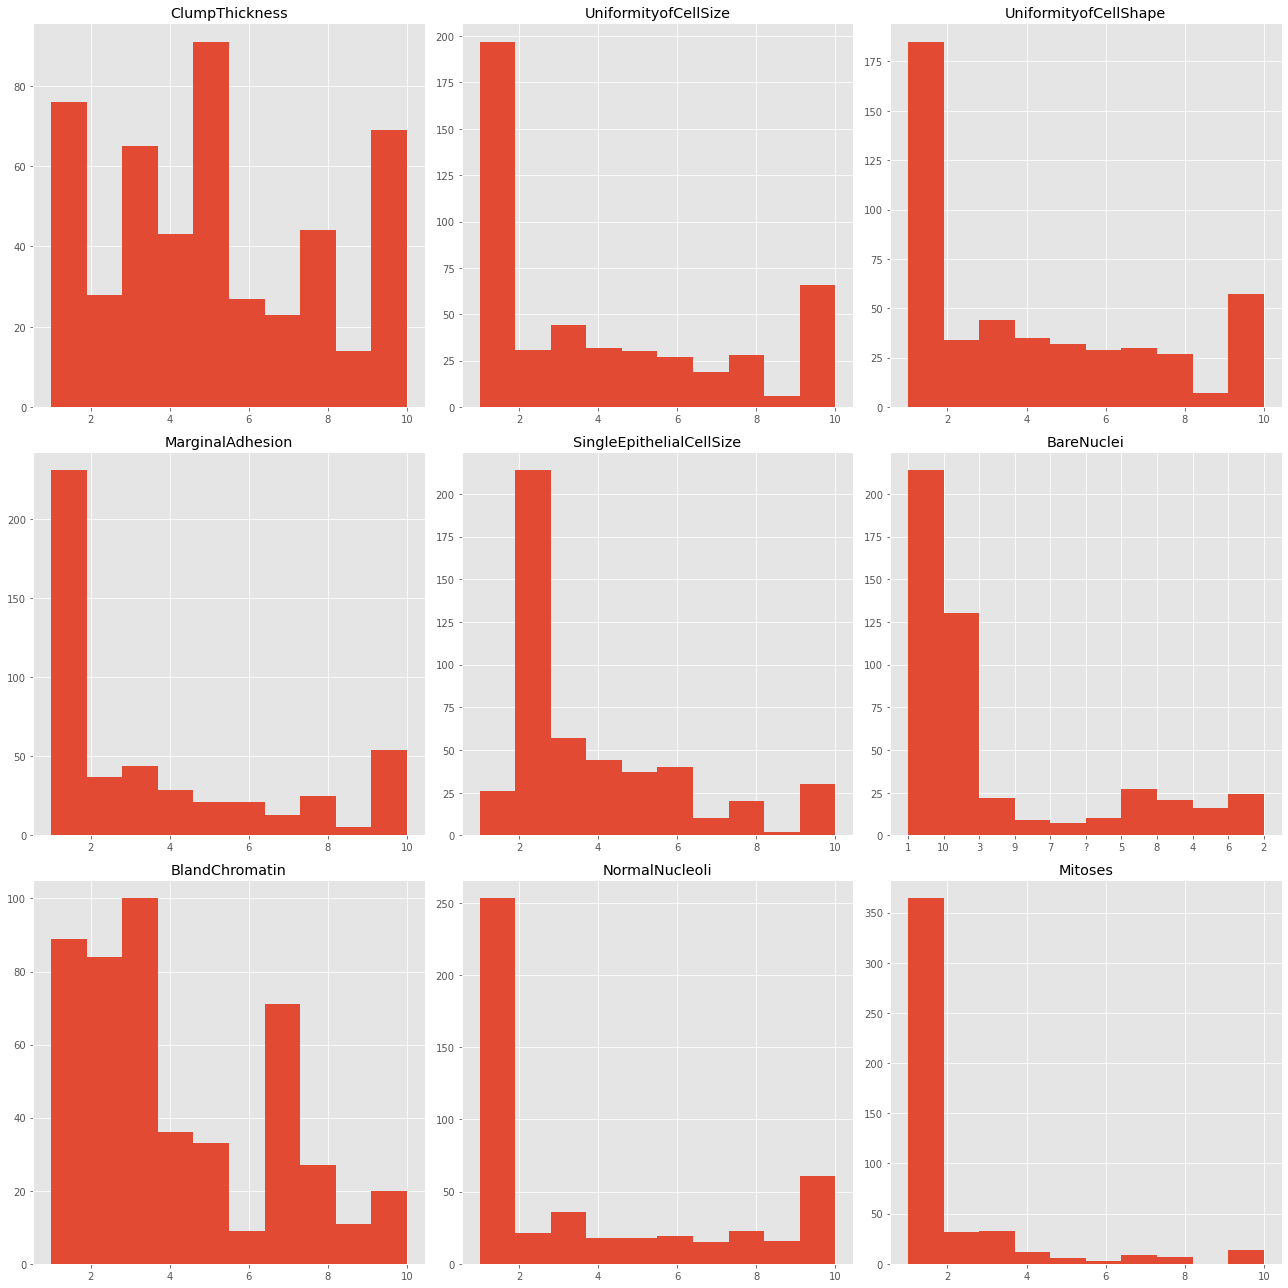

In [9]:
# plot date variables and find the variables with similar distributions, keep only one of them.
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']
fig, axs = plt.subplots(3, 3, figsize=(18,18))
axs[0,0].hist(cancer['ClumpThickness'])
axs[0,0].set_title("ClumpThickness")
axs[0,1].hist(cancer['UniformityofCellSize'])
axs[0,1].set_title("UniformityofCellSize")
axs[0,2].hist(cancer['UniformityofCellShape'])
axs[0,2].set_title("UniformityofCellShape")
axs[1,0].hist(cancer['MarginalAdhesion'])
axs[1,0].set_title("MarginalAdhesion")
axs[1,1].hist(cancer['SingleEpithelialCellSize'])
axs[1,1].set_title("SingleEpithelialCellSize")
axs[1,2].hist(cancer['BareNuclei'])
axs[1,2].set_title("BareNuclei")
axs[2,0].hist(cancer['BlandChromatin'])
axs[2,0].set_title("BlandChromatin")
axs[2,1].hist(cancer['NormalNucleoli'])
axs[2,1].set_title("NormalNucleoli")
axs[2,2].hist(cancer['Mitoses'])
axs[2,2].set_title("Mitoses")
fig.tight_layout()

<h4>1.1.2 Observations </h4>
<ol>
    <li>The class counts is in a 2:1 ratio with benign being 458 and malignant being 241</li>
    <li>The graph shows that data is very skewed for every attribute</li>
</ol>
<h4>1.1.3 Approach </h4>
<ol>
    <li>First we make the class ratio 1:1 and making data points to 240 for each class</li>
</ol>

<h3>1.2 Checking and Removing nan values</h3>

<h4>1.2.1 Code </h4>

In [10]:
# Printing all the value counts 
cancer.dtypes.value_counts()

int64     9
object    1
dtype: int64

In [11]:
# Printing data types
cancer.select_dtypes('object')

,BareNuclei
0,1
1,10
2,1
3,1
4,1
...,...
475,2
476,1
477,3
478,4


In [12]:
#Replacing nan Values
cancer = cancer.replace('?' ,np.nan)

##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': cancer.isnull().sum(), 'Percent': 100*cancer.isnull().sum()/len(cancer)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]

,Count,Percent
BareNuclei,10,2.083333


In [13]:
## Filling the columns with nan values with mean of the data
cancer["BareNuclei"]=cancer["BareNuclei"].astype(float)
cancer=cancer.fillna(cancer.mean())

<h4>1.2.2 Observations </h4>
<ol>
    <li>We obsereve that there is one attribute that is not in integer format</li>
    <li>We find that there are nan values in BareNuclei. It also mentioned in the .names file </li>
</ol>
<h4>1.2.3 Approach </h4>
<ol>
    <li>We find that BareNuclei is a object type attribute so we convert it to float</li>
    <li>We replace nan values in BareNuclei with mean value of BareNuclei</li>
</ol>

<h3>1.3 Removing Useless Attributes </h3>

<h4>1.3.1 Code </h4>

In [14]:
#Sorting with correlation values
corr_list1=cancer.corr()['classes'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
corr_list1
cancer=cancer[corr_list_new]
cancer.head(3)

,classes,UniformityofCellShape,BareNuclei,UniformityofCellSize,BlandChromatin,ClumpThickness,NormalNucleoli,SingleEpithelialCellSize,MarginalAdhesion,Mitoses
0,0,1,1.0,1,3,5,1,2,1,1
1,1,10,10.0,10,9,8,7,7,8,1
2,0,1,1.0,1,1,2,1,2,1,5


In [15]:
## To remove outliers first we have to find the correlation between attributes

#find the variables with high correlations
cor1 = cancer.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.70].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)

classes                   classes                     1.000000
UniformityofCellShape     UniformityofCellSize        0.893994
                          classes                     0.796325
classes                   BareNuclei                  0.791058
UniformityofCellSize      classes                     0.786908
SingleEpithelialCellSize  UniformityofCellSize        0.734703
classes                   BlandChromatin              0.734179
BlandChromatin            UniformityofCellSize        0.732604
UniformityofCellShape     BlandChromatin              0.712377
classes                   ClumpThickness              0.710851
SingleEpithelialCellSize  UniformityofCellShape       0.699849
UniformityofCellShape     NormalNucleoli              0.680091
UniformityofCellSize      NormalNucleoli              0.678900
UniformityofCellShape     BareNuclei                  0.673101
NormalNucleoli            classes                     0.672801
UniformityofCellSize      MarginalAdhesion            0

In [16]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(cancer.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "classes" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
cancer_final=cancer[columnlist]

In [17]:
# Numpy Reference in [1]
# To shuffle data and then split  
def shuffle_split_data(x, y):
    arr_rand = np.random.rand(x.shape[0])
    split = arr_rand < np.percentile(arr_rand, 75)

    x_train = x[split]
    y_train = y[split]
    x_test =  x[~split]
    y_test = y[~split]

    #print(len(x_train), len(y_train), len(x_test), len(y_test))
    return x_train, y_train, x_test, y_test


# Dividing the data in classes  
x = cancer_final.drop(['classes'], 1)
y = cancer_final[['classes']]
x = np.array(x)
y = np.array(y)
train_x_norm,train_y_norm,test_x_norm,test_y_norm = shuffle_split_data(x,y)

<h4>1.3.2 Observations </h4>
<ol>
    <li>We find the correlation list of the attributes</li>
</ol>

<h4>1.3.3 Approach </h4>
<ol>
    <li>We remove the attributes that have low correlations from the data frame</li>
    <li>We split the data in test and train datasets</li>
</ol>

<h3>1.4 Deleting Outliers and Data Normalizations</h3>

<h4>1.4.1 Code </h4>

In [18]:
# Remove outliers
cancer_norm = cancer_final[(np.abs(scipy.stats.zscore(cancer_final)) < 3).all(axis=1)]
# Zero mean normalisation
cancer_norm.iloc[:,1:]=(cancer_norm.iloc[:,1:]-cancer_norm.iloc[:,1:].mean())/cancer_norm.iloc[:,1:].std()

In [19]:
#printing the normalized head of the data
cancer_norm.head()

,classes,UniformityofCellShape,BareNuclei,ClumpThickness,NormalNucleoli,SingleEpithelialCellSize,MarginalAdhesion,Mitoses
0,0,-0.903614,-0.892124,0.014124,-0.730119,-0.668903,-0.751240,-0.413631
1,1,1.990052,1.430751,1.037711,1.082999,1.517895,1.525868,-0.413631
2,0,-0.903614,-0.892124,-1.009464,-0.730119,-0.668903,-0.751240,2.931858
3,0,-0.903614,-0.892124,-0.327072,-0.730119,-0.668903,-0.751240,-0.413631
4,0,-0.903614,-0.892124,-1.350660,-0.730119,-1.106262,-0.751240,-0.413631


In [20]:
# Numpy Reference in [1]
# To shuffle the data and split data
def shuffle_split_data(x, y):
    
    # To randomize 
    arr_rand = np.random.rand(x.shape[0])
    
    # To split numpy percentile by frequency 
    split = arr_rand < np.percentile(arr_rand, 75)

    x_train = x[split]
    y_train = y[split]
    x_test =  x[~split]
    y_test = y[~split]
    
    # Return train and test
    return x_train, y_train, x_test, y_test

# Dividing the data in classes 
x = cancer_norm.drop(['classes'], 1)
y = cancer_norm[['classes']]
x = np.array(x)
y = np.array(y)
train_x_norm,train_y_norm,test_x_norm,test_y_norm = shuffle_split_data(x,y)

In [21]:
# Print the shape of the data attributes
x_train = np.array(train_x_norm)
print('X_train Shape :',x_train.shape)
y_train = np.array(train_y_norm)
print('Y_train Shape :',y_train.shape)
x_test = np.array(test_x_norm)
print('X_test Shape  :',x_test.shape)
y_test = np.array(test_y_norm)
print('Y_test Shape  :',y_test.shape)

X_train Shape : (344, 7)
Y_train Shape : (344, 1)
X_test Shape  : (115, 7)
Y_test Shape  : (115, 1)


In [22]:
# Changed the shape of the y_train from (x,1) to (x,)
y_train=y_train.reshape(len(y_train))
print(y_train.shape)
y_test=y_test.reshape(len(y_test))
print(y_test.shape)

(344,)
(115,)


<h3>1.5 Conclusion </h3>
<ol>
    <li>We removed the NAN values from our data and replaced them with mean values</li>
    <li>We only keep highly correlated attributes in our final attribute list</li>
    <li>We filter our data using the zscores and then normalize it usind mean and standard deviation</li>
</ol>

<h2><center>2. Model Fiting on the clean data</center></h2>

We have a cleaned and a normalized data now we just have to fit a model over the data and make predictions.
We are going to implement 2 models that are implemented by us 

<ol>
    <li>SGD Classifier with Log Loss</li>
    <li>SVM with RBF kernel</li>
</ol>


<h3>2.1 SGD Classifier with Log Loss</h3>

<h4>2.1.1 Function Call</h4>

In [23]:
## importing self made SGD classifier as Classifier 1 
import Sgd_classifier as classfier_1
alpha=0.001
t_rate=0.001
N=len(x_train)
epochs=300
w,b,loss_train,loss_test=classfier_1.train_classifier(x_train,y_train,x_test,y_test,epochs,alpha,t_rate)

  8%|▊         | 24/300 [00:00<00:01, 238.40it/s]


-- Epoch no(iteration no)  1
W intercept: [0.00796375 0.00545883 0.00980151 0.0066493  0.00960425 0.00573659
 0.00228481], B intercept: 0.00047792073286217986, Train loss: 0.29384, Test loss: 0.29430

-- Epoch no(iteration no)  2
W intercept: [0.01635098 0.0139355  0.01719311 0.0160534  0.01809569 0.01010516
 0.00972834], B intercept: 0.004870964364459648, Train loss: 0.28615, Test loss: 0.28726

-- Epoch no(iteration no)  3
W intercept: [0.02429736 0.02340162 0.02599172 0.02135924 0.02842867 0.01718783
 0.01426521], B intercept: 0.008143504180801665, Train loss: 0.27850, Test loss: 0.28023

-- Epoch no(iteration no)  4
W intercept: [0.03514896 0.03465238 0.03352349 0.02918411 0.03746528 0.02378703
 0.02094237], B intercept: 0.011196625156419629, Train loss: 0.27022, Test loss: 0.27258

-- Epoch no(iteration no)  5
W intercept: [0.04683763 0.04480396 0.04599936 0.03987794 0.04434549 0.03188165
 0.0231801 ], B intercept: 0.015037594686431548, Train loss: 0.26157, Test loss: 0.26453

--

-- Epoch no(iteration no)  42
W intercept: [0.27118686 0.28482101 0.25032387 0.22217704 0.22187387 0.21732793
 0.11412206], B intercept: -0.0037957935399270623, Train loss: 0.13577, Test loss: 0.14486

-- Epoch no(iteration no)  43
W intercept: [0.27466818 0.28657658 0.25558166 0.22461696 0.22520384 0.21586629
 0.11567186], B intercept: 0.0002569106358434724, Train loss: 0.13474, Test loss: 0.14390

-- Epoch no(iteration no)  44
W intercept: [0.27811304 0.29125243 0.2588563  0.22741536 0.22970335 0.21913114
 0.11788454], B intercept: 0.0018226794803387308, Train loss: 0.13326, Test loss: 0.14250


 17%|█▋        | 52/300 [00:00<00:00, 262.43it/s]


-- Epoch no(iteration no)  45
W intercept: [0.28256559 0.29614948 0.26305747 0.22928215 0.23254791 0.22178434
 0.1206263 ], B intercept: 0.0020025357297667147, Train loss: 0.13180, Test loss: 0.14112

-- Epoch no(iteration no)  46
W intercept: [0.28637628 0.30096945 0.26676962 0.23258037 0.23461991 0.22480673
 0.12050765], B intercept: 0.004429869817026731, Train loss: 0.13047, Test loss: 0.13987

-- Epoch no(iteration no)  47
W intercept: [0.28980198 0.30508322 0.27138459 0.23433232 0.23732243 0.22782881
 0.1220507 ], B intercept: 0.004737571384936664, Train loss: 0.12918, Test loss: 0.13865

-- Epoch no(iteration no)  48
W intercept: [0.29300383 0.30914478 0.27605526 0.23879483 0.23911208 0.23169731
 0.12352416], B intercept: 0.005276328570524959, Train loss: 0.12779, Test loss: 0.13732

-- Epoch no(iteration no)  49
W intercept: [0.29591532 0.31399111 0.2800474  0.23992599 0.24038    0.23523218
 0.12528788], B intercept: 0.007332065716998066, Train loss: 0.12664, Test loss: 0.13624

 26%|██▋       | 79/300 [00:00<00:00, 242.08it/s]


-- Epoch no(iteration no)  54
W intercept: [0.31675409 0.33789703 0.2953919  0.25737339 0.25731038 0.25259912
 0.13161272], B intercept: -0.004333809720166167, Train loss: 0.11991, Test loss: 0.12973

-- Epoch no(iteration no)  55
W intercept: [0.32167015 0.34105489 0.29841382 0.26142029 0.2602334  0.25554009
 0.13367514], B intercept: -0.006229366003552263, Train loss: 0.11870, Test loss: 0.12856

-- Epoch no(iteration no)  56
W intercept: [0.32446529 0.34262454 0.3020977  0.26306932 0.26283031 0.25626888
 0.13386575], B intercept: -0.004920081880912843, Train loss: 0.11798, Test loss: 0.12788

-- Epoch no(iteration no)  57
W intercept: [0.32787536 0.34549701 0.30622163 0.26654452 0.26541176 0.25671321
 0.13568201], B intercept: -0.0020902695090824134, Train loss: 0.11701, Test loss: 0.12696

-- Epoch no(iteration no)  58
W intercept: [0.33063444 0.34942034 0.3094473  0.26847966 0.26903904 0.25925692
 0.13730381], B intercept: -0.00021237639312972768, Train loss: 0.11600, Test loss: 


-- Epoch no(iteration no)  96
W intercept: [0.4369187  0.47291745 0.41321081 0.34927509 0.34444849 0.34050247
 0.17396459], B intercept: -0.008306496871430834, Train loss: 0.08974, Test loss: 0.10102

-- Epoch no(iteration no)  97
W intercept: [0.44019506 0.47449658 0.415297   0.35188971 0.34574665 0.34232094
 0.1732344 ], B intercept: -0.006693505544515541, Train loss: 0.08930, Test loss: 0.10060

-- Epoch no(iteration no)  98
W intercept: [0.44182202 0.47519017 0.41903767 0.3526237  0.34703844 0.34021103
 0.17438172], B intercept: -0.003521711673564556, Train loss: 0.08905, Test loss: 0.10035

-- Epoch no(iteration no)  99
W intercept: [0.44368088 0.47779024 0.42073571 0.35407606 0.34965328 0.34177636
 0.17494929], B intercept: -0.0025314741306484904, Train loss: 0.08862, Test loss: 0.09995

-- Epoch no(iteration no)  100
W intercept: [0.44607718 0.48126029 0.42327453 0.35421241 0.35060105 0.3433476
 0.1764641 ], B intercept: -0.0023789472774723274, Train loss: 0.08818, Test loss: 0

 46%|████▌     | 137/300 [00:00<00:00, 265.48it/s]


-- Epoch no(iteration no)  106
W intercept: [0.45784196 0.49760617 0.43720226 0.36321608 0.35748009 0.35427281
 0.17999141], B intercept: -0.003308077451104901, Train loss: 0.08572, Test loss: 0.09723

-- Epoch no(iteration no)  107
W intercept: [0.46074541 0.50018144 0.43876552 0.36544258 0.35894558 0.35510638
 0.18087179], B intercept: -0.004851893726749258, Train loss: 0.08532, Test loss: 0.09684

-- Epoch no(iteration no)  108
W intercept: [0.46331198 0.5038016  0.4402044  0.36671804 0.36111603 0.35750508
 0.18124173], B intercept: -0.004866535174246848, Train loss: 0.08486, Test loss: 0.09641

-- Epoch no(iteration no)  109
W intercept: [0.46522831 0.50626297 0.44187315 0.36951213 0.36360248 0.36051662
 0.18246728], B intercept: -0.006848823858248491, Train loss: 0.08441, Test loss: 0.09598

-- Epoch no(iteration no)  110
W intercept: [0.46806066 0.50808994 0.4438028  0.37195774 0.36556598 0.36205246
 0.18387186], B intercept: -0.008192297482597545, Train loss: 0.08399, Test loss

-- Epoch no(iteration no)  149
W intercept: [0.53737492 0.59074833 0.51701357 0.42029361 0.4100382  0.40767326
 0.20560523], B intercept: -0.003224384061613447, Train loss: 0.07318, Test loss: 0.08547

-- Epoch no(iteration no)  150
W intercept: [0.53943496 0.59340562 0.51805198 0.42154975 0.41182161 0.41034063
 0.20615611], B intercept: -0.0037722719259517747, Train loss: 0.07290, Test loss: 0.08521

-- Epoch no(iteration no)  151
W intercept: [0.54088356 0.59490108 0.51962795 0.42399224 0.41359147 0.41147879
 0.20744884], B intercept: -0.005106214497707612, Train loss: 0.07266, Test loss: 0.08499

-- Epoch no(iteration no)  152
W intercept: [0.54342622 0.59598548 0.52113959 0.42599705 0.41416007 0.41279708
 0.20652733], B intercept: -0.0034270379692337106, Train loss: 0.07245, Test loss: 0.08478

-- Epoch no(iteration no)  153
W intercept: [0.54432869 0.59617794 0.52431531 0.42598395 0.41483671 0.41042281
 0.20757703], B intercept: -0.00046641940141271376, Train loss: 0.07234, Test l

 64%|██████▎   | 191/300 [00:00<00:00, 253.60it/s]


-- Epoch no(iteration no)  163
W intercept: [0.55911566 0.61703335 0.53920969 0.43460767 0.42357411 0.42199919
 0.21201216], B intercept: -0.0014736747748109282, Train loss: 0.07036, Test loss: 0.08285

-- Epoch no(iteration no)  164
W intercept: [0.56048688 0.6189047  0.54038582 0.43681585 0.42547567 0.42432582
 0.21294496], B intercept: -0.0029908144787066855, Train loss: 0.07013, Test loss: 0.08264

-- Epoch no(iteration no)  165
W intercept: [0.56241989 0.62019801 0.54175862 0.4385819  0.42687047 0.42539833
 0.21399409], B intercept: -0.003994853730871293, Train loss: 0.06993, Test loss: 0.08246

-- Epoch no(iteration no)  166
W intercept: [0.56358668 0.62072161 0.54348354 0.43923315 0.42626659 0.42427831
 0.21371863], B intercept: -0.0024519169528740554, Train loss: 0.06985, Test loss: 0.08238

-- Epoch no(iteration no)  167
W intercept: [0.56520956 0.62131651 0.54610476 0.44044806 0.42789727 0.42412709
 0.21434628], B intercept: 0.000647265035840956, Train loss: 0.06967, Test lo

 81%|████████  | 242/300 [00:00<00:00, 237.40it/s]


-- Epoch no(iteration no)  209
W intercept: [0.61923847 0.68746277 0.60424964 0.4763604  0.4605139  0.45816326
 0.23081931], B intercept: 0.006700106697821739, Train loss: 0.06364, Test loss: 0.07667

-- Epoch no(iteration no)  210
W intercept: [0.62075749 0.68972257 0.60548902 0.47602635 0.4611219  0.45883228
 0.23158202], B intercept: 0.0068364113399294645, Train loss: 0.06351, Test loss: 0.07655

-- Epoch no(iteration no)  211
W intercept: [0.62114061 0.69155097 0.60611405 0.47589339 0.4611778  0.45938581
 0.2310824 ], B intercept: 0.008480940454581741, Train loss: 0.06344, Test loss: 0.07648

-- Epoch no(iteration no)  212
W intercept: [0.62149327 0.69237294 0.60755994 0.47628264 0.46133306 0.46074546
 0.23164166], B intercept: 0.007905898491238688, Train loss: 0.06336, Test loss: 0.07641

-- Epoch no(iteration no)  213
W intercept: [0.62244807 0.69372366 0.60925873 0.47755483 0.46137286 0.46124399
 0.23184084], B intercept: 0.0085143249329963, Train loss: 0.06324, Test loss: 0.07

-- Epoch no(iteration no)  250
W intercept: [0.66333607 0.74226429 0.65312243 0.50422806 0.48472795 0.4839307
 0.24411765], B intercept: 0.013217544577618241, Train loss: 0.05957, Test loss: 0.07300

-- Epoch no(iteration no)  251
W intercept: [0.66480556 0.74449742 0.65399287 0.50387386 0.48538811 0.48480016
 0.24491682], B intercept: 0.01311078466207159, Train loss: 0.05947, Test loss: 0.07291

-- Epoch no(iteration no)  252
W intercept: [0.66575979 0.74592519 0.65481366 0.50430133 0.48634358 0.48545469
 0.24494432], B intercept: 0.013429416599540554, Train loss: 0.05938, Test loss: 0.07283

-- Epoch no(iteration no)  253
W intercept: [0.6661175  0.74740315 0.65591141 0.50416485 0.4856619  0.48574024
 0.24456959], B intercept: 0.014696150925483998, Train loss: 0.05933, Test loss: 0.07278

-- Epoch no(iteration no)  254
W intercept: [0.66596067 0.74786823 0.65717297 0.50481231 0.48534296 0.48681698
 0.24496806], B intercept: 0.014315042961771442, Train loss: 0.05928, Test loss: 0.0727

 89%|████████▊ | 266/300 [00:01<00:00, 226.71it/s]


-- Epoch no(iteration no)  255
W intercept: [0.66667646 0.74936637 0.65911335 0.50400239 0.48452741 0.48715731
 0.24562306], B intercept: 0.01430632197638786, Train loss: 0.05921, Test loss: 0.07269

-- Epoch no(iteration no)  256
W intercept: [0.66760555 0.75049921 0.65972066 0.5052763  0.48552557 0.4890909
 0.24570045], B intercept: 0.014115077221519449, Train loss: 0.05912, Test loss: 0.07261

-- Epoch no(iteration no)  257
W intercept: [0.66905264 0.75230927 0.66072599 0.50626507 0.48679309 0.48969376
 0.24625172], B intercept: 0.012409933197195355, Train loss: 0.05901, Test loss: 0.07252

-- Epoch no(iteration no)  258
W intercept: [0.67072572 0.75356143 0.66128817 0.50760906 0.4875837  0.48929233
 0.2469462 ], B intercept: 0.011008057325764556, Train loss: 0.05893, Test loss: 0.07245

-- Epoch no(iteration no)  259
W intercept: [0.6717879  0.75499632 0.66229796 0.50843164 0.4885414  0.49048596
 0.24727043], B intercept: 0.010732158021411142, Train loss: 0.05883, Test loss: 0.072

 96%|█████████▋| 289/300 [00:01<00:00, 222.77it/s]

 287
W intercept: [0.69762663 0.78779217 0.69092024 0.52389732 0.50196832 0.50557444
 0.25480429], B intercept: 0.015799308232490518, Train loss: 0.05681, Test loss: 0.07058

-- Epoch no(iteration no)  288
W intercept: [0.6985747  0.78900472 0.69174187 0.52532607 0.50317015 0.50668691
 0.25545493], B intercept: 0.014375176030657584, Train loss: 0.05673, Test loss: 0.07051

-- Epoch no(iteration no)  289
W intercept: [0.70033803 0.78954582 0.69218439 0.52693151 0.50407158 0.50739753
 0.25590472], B intercept: 0.01465872060245981, Train loss: 0.05666, Test loss: 0.07044

-- Epoch no(iteration no)  290
W intercept: [0.7004981  0.7895637  0.69365328 0.5266143  0.5037069  0.50590034
 0.25555222], B intercept: 0.015968065778397107, Train loss: 0.05664, Test loss: 0.07042

-- Epoch no(iteration no)  291
W intercept: [0.70133209 0.78986775 0.69594934 0.52731251 0.50401093 0.50537805
 0.25619602], B intercept: 0.01841605568506421, Train loss: 0.05657, Test loss: 0.07035

-- Epoch no(iteration n

100%|██████████| 300/300 [00:01<00:00, 239.42it/s]


-- Epoch no(iteration no)  299
W intercept: [0.70717687 0.80016231 0.70315256 0.52924381 0.506411   0.51098784
 0.25785893], B intercept: 0.01846718401019026, Train loss: 0.05609, Test loss: 0.06994

-- Epoch no(iteration no)  300
W intercept: [0.70845556 0.80107974 0.70399837 0.53038295 0.50694251 0.51077506
 0.25842655], B intercept: 0.0174128883965348, Train loss: 0.05602, Test loss: 0.06989


<h4>2.1.2 Coding Approach</h4>
We send our train data, test data, with learning rate and regularization rate to our classifier. The classifier uses Stochastic gradient descent and updates the weights and bais over the epochs. With each epoch we aim to reduce our loss, when we reach a point where the loss is similar to the loss that was in previous epoch we return then updated weights and bais. These weights and bais that are returned are optimal for making predictions.

<h3>2.2 SVM with RBF kernel </h3>

<h4>2.2.1 Function Call</h4>

In [24]:
# import Svm_classifier as classfier_2

# a1=classfier_2.SVM(kernel='rbf', C=0.5, max_iter=10, gamma=0.001)
# a1.fit(x_train,y_train)

import Svm_classifier as classfier_2

clf2=classfier_2.OurSVM(kernel='rbf', C=1.0, gamma=0.001)
clf2.fit(x_train, y_train)
#y_ = a1.predict(x_test)

<h4>2.2.2 Coding Approach</h4>
To optimize or the learning process you don't necessarily need W and B so just look at the form of optimization for this objective. (SMO)
In SMO, it will write in terms of the kernels (Kij) just to make it more general and the main idea behind sequential minimal optimization is to optimize two variables at a time rather than trying to optimize all n variables, so rather than minimizing alpha the whole vector alpha we will just alphaA(α_a) and alphaB(α_b) .To initialize, you could just randomly choose alphaA and alphaB. 
You can take derivative of it by separating terms in it.


<h2><center>3. Model Accuracy</center></h2>
<em>
Here we are going to talk about the model accuracies by using test and train loss graphs, in addition to Confussion Matrix and some ROC curves
</em>

<h3>3.1 Model 1 SGD Classifier with Log Loss</h3>


<h4>3.1.1 Prediction accuracies</h4>

In [25]:
# Getting the predict vector for the train and test data
y_train_pred = classfier_1.predict(w,b,x_train)
y_test_pred = classfier_1.predict(w,b,x_test)

# Reference Numpy[2]
print('Train_Accuracy : {:.3f}'.format((y_train ==  y_train_pred).sum() / len(x_train)))
print('Test_Accuracy  : {:.3f}'.format((y_test ==  y_test_pred).sum() / len(x_test)))

Train_Accuracy : 0.965
Test_Accuracy  : 0.957


<h4>3.1.2 Test and Train Loss over Epochs</h4>
We will plot graph against the number of epochs with respect to the test and train loss. This will give us insight whether our code is performing gradient descent in a correct manner.

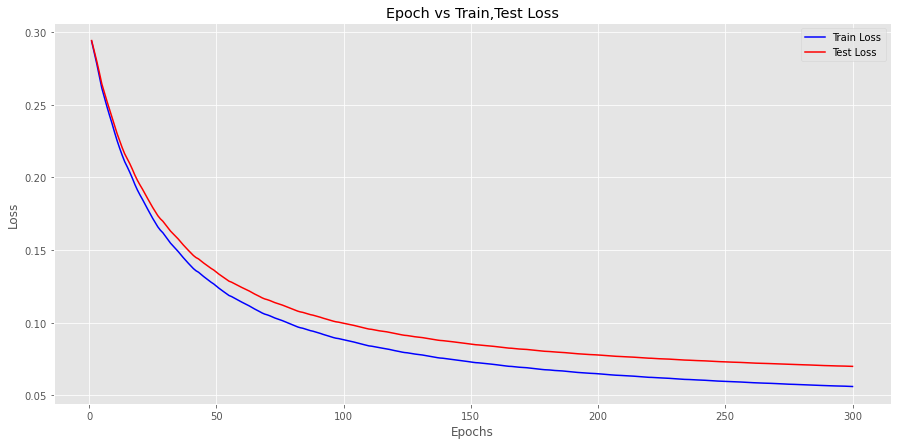

In [26]:
# Converting epochs to an array and ploting the graphs of test and train loss over the epochs
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(15, 7))
plt.plot(epochs,loss_train, label='Train Loss', c = 'blue')
plt.plot(epochs,loss_test, label='Test Loss',c = 'red')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
print(110*'=')


<h4>3.1.3 Confusion Matrix and Performance Metrics</h4>
The confusion matrix we plot here looks like the table mentioned below :-
<table>
  <tr>
    <th><em><h4>Total Population</h4></em></th>
    <th><em><h4>Malignant</h4></em></th>
    <th><em><h4>Benign</h4></em></th>
  </tr>
  <tr>
    <td><center><em><h4>Predicted Malignant</h4></em></center></td>
      <td><center><h5>True Positives</h5></center></td>
    <td><center><h5>False Positives</h5></center></td> 
  </tr>
  <tr>
     <td><em><h4>Predicted Benign</h4></em></td>
     <td><center><h5>False Negatives</h5></center></td>
     <td><center><h5>True Negatives</h5></center></td>
  </tr>
</table>



In [27]:
# Calling our confusion matrix from the directory

import confusion_matrix as cm
cm_sgd,fpr_sgd,recall_sgd,AUC_score_sgd,precision_sgd,F1_score_sgd= cm.confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix\n',cm_sgd)
print('False Positive Rate :   {:.3f}'.format(fpr_sgd))
print('True Positive Rate  :   {:.3f}'.format(recall_sgd))
print('Precision of model  :   {:.3f}'.format(precision_sgd))
print('Area Under Curve (AUC): {:.3f}'.format(AUC_score_sgd))
print('F1 score of model   :   {:.3f}'.format(F1_score_sgd))


Confusion Matrix
 [[44  2]
 [ 3 66]]
False Positive Rate :   0.029
True Positive Rate  :   0.936
Precision of model  :   0.957
Area Under Curve (AUC): 0.957
F1 score of model   :   0.946


<h3> 3.2 Model 2 SVM with RBF Kernel</h3>

<h4>3.2.1 Prediction accuracies</h4>

In [28]:
# Getting the predict vector for the train and test data
# Reference Numpy[2]
y_train_pred_svm = clf2.predict(x_train)
y_test_pred_svm= clf2.predict(x_test)
print('Train_Accuracy : {:.3f}'.format((y_train ==  y_train_pred_svm).sum() / len(x_train)))
print('Test_Accuracy  : {:.3f}'.format((y_test ==  y_test_pred_svm).sum() / len(x_test)))


# Accuracy for the svm drops sometimes when it is runned first time please try once more by restarting the kernel 
# The accuracy should be above .90 for the implemented code 

Train_Accuracy : 0.974
Test_Accuracy  : 0.965


<h4>3.2.2  Learning Curve</h4>

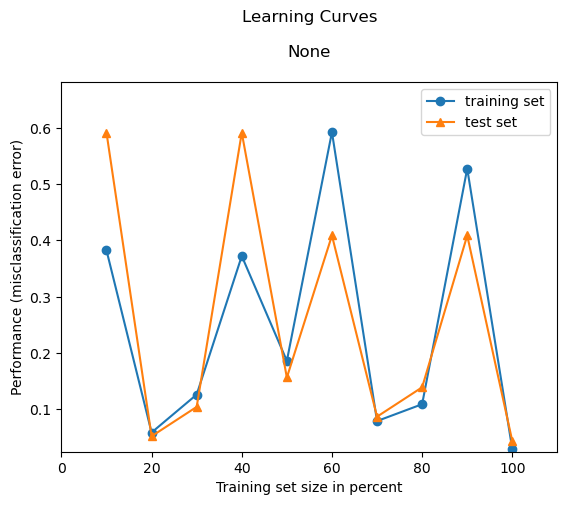

In [29]:
# To plot the graph
from mlxtend.plotting import *

plot_learning_curves(x_train,y_train, x_test,  y_test,clf2)
plt.show()

<h4>3.2.3 Confusion Matrix and Performance Metrics</h4> 
The confusion matrix we plot here looks like the table mentioned below :-
<table>
  <tr>
    <th><em><h4>Total Population</h4></em></th>
    <th><em><h4>Malignant</h4></em></th>
    <th><em><h4>Benign</h4></em></th>
  </tr>
  <tr>
    <td><center><em><h4>Predicted Malignant</h4></em></center></td>
      <td><center><h5>True Positives</h5></center></td>
    <td><center><h5>False Positives</h5></center></td> 
  </tr>
  <tr>
     <td><em><h4>Predicted Benign</h4></em></td>
     <td><center><h5>False Negatives</h5></center></td>
     <td><center><h5>True Negatives</h5></center></td>
  </tr>
</table>

In [30]:
# Calling our confusion matrix from the directory

import confusion_matrix as cm
cm_svm,fpr_svm,recall_svm,AUC_score_svm,precision_svm,F1_score_svm= cm.confusion_matrix(y_test, y_test_pred_svm)
print('Confusion Matrix\n',cm_svm)
print('False Positive Rate :   {:.3f}'.format(fpr_svm))
print('True Positive Rate  :   {:.3f}'.format(recall_svm))
print('Precision of model  :   {:.3f}'.format(precision_svm))
print('Area Under Curve (AUC): {:.3f}'.format(AUC_score_svm))
print('F1 score of model   :   {:.3f}'.format(F1_score_svm))



Confusion Matrix
 [[45  2]
 [ 2 66]]
False Positive Rate :   0.029
True Positive Rate  :   0.957
Precision of model  :   0.957
Area Under Curve (AUC): 0.965
F1 score of model   :   0.957


In [31]:
# Making a data frame of all the result 
cols = ['Metric' , 'SGD Classifier' , 'SVM Classifier']
values = [['F1_score',F1_score_sgd,F1_score_svm] ,[ 'Recal',recall_sgd,recall_svm]\
          ,['FPR',fpr_sgd,fpr_svm],['AUC',AUC_score_sgd,AUC_score_svm]\
          ,['Precision',precision_sgd,precision_svm]]
result = pd.DataFrame(values, columns = cols) 

<h2><center>Conclusions</center></h2>
We were given a task to implement a model which was meant to classify between Malignant and Benign and measure the performance metrics of the implemented model. To achive the aim of the coursework we made two classification models that perform binary classification for the given dataset. 
<br> </br>
<p>
<em>
The following are the results obtained by comparing the respective models :-
<p></em>
<em>    
    

<h4><center>Model Comparisions</center></h4>

<h4><center>Metrics Comparsions</center></h4>


In [32]:
# Printing the result and making comparisions 
print(result)

      Metric  SGD Classifier  SVM Classifier
0   F1_score        0.946237        0.957447
1      Recal        0.936170        0.957447
2        FPR        0.029412        0.029412
3        AUC        0.956522        0.965217
4  Precision        0.956522        0.957447


<h2><center> Coding References</center></h2>



1.  [Confusion Matrix](https://www.nbshare.io/notebook/626706996/Learn-And-Code-Confusion-Matrix-With-Python/)
2.  [SGD Classifier <sup>[1]</sup>](https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/logistic-regression.pdf)
3. [SGD Classifier <sup>[2]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
4. [SVM <sup>[1]</sup>](https://www.researchgate.net/publication/344460740)
5. [SVM <sup>[2]</sup>](http://pages.cs.wisc.edu/~dpage/cs760/SMOlecture.pdf )
6. [SVM <sup>[3]</sup>](https://assets.ctfassets.net/btheynltg5cn/56U1s76MdxjNtjfHLhRUcL/814561f414677a25a2d863a3f52ebf7f/sequential-minimal-optimization__4___1_.pdf)
7. [SVM <sup>[4]</sup>](https://ufal.mff.cuni.cz/~straka/courses/npfl129/1920/slides.pdf/npfl129-07.pdf)
8. [Pandas <sup>[1]</sup>](https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe)
9. [Pandas <sup>[2]</sup>](https://discourse.jupyter.org/t/inline-variable-insertion-in-markdown/10525/13)
10. [Numpy<sup>[1]</sup>](https://stackoverflow.com/questions/35932223/writing-a-train-test-split-function-with-numpy)
11. [Numpy<sup>[2]</sup>](https://stackoverflow.com/questions/38877301/how-to-calculate-accuracy-based-on-two-lists-python)
